In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from zipfile import ZipFile
with ZipFile('/content/drive/MyDrive/archive.zip', 'r') as zipObj:

    zipObj.extractall('MWD')

In [ ]:
pip install split-folders[full]

In [3]:
import splitfolders

#input_folder = '/content/MWD/Multi-class Weather Dataset'
input_folder = 'C:/Users/Madhusmita Das/Downloads/MWD/Multi-class Weather Dataset'
splitfolders.ratio(input_folder, output="dataset", seed=42, ratio=(0.7, 0.3), group_prefix=None)


In [5]:
pip install opencv-python


   ---------------------------------------- 0.0/38.6 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.6 MB 1.4 MB/s eta 0:00:29
   ---------------------------------------- 0.0/38.6 MB 495.5 kB/s eta 0:01:18
   ---------------------------------------- 0.1/38.6 MB 751.6 kB/s eta 0:00:52
   ---------------------------------------- 0.1/38.6 MB 751.6 kB/s eta 0:00:52
   ---------------------------------------- 0.2/38.6 MB 821.4 kB/s eta 0:00:47
   ---------------------------------------- 0.2/38.6 MB 986.4 kB/s eta 0:00:39
   ---------------------------------------- 0.3/38.6 MB 1.1 MB/s eta 0:00:34
   ---------------------------------------- 0.5/38.6 MB 1.3 MB/s eta 0:00:29
    --------------------------------------- 0.6/38.6 MB 1.5 MB/s eta 0:00:26
    --------------------------------------- 0.6/38.6 MB 1.5 MB/s eta 0:00:26
    --------------------------------------- 0.6/38.6 MB 1.5 MB/s eta 0:00:26
    --------------------------------------- 0.6/38.6 MB 1.5 MB/s eta 0:00

In [6]:
import os
import cv2
import numpy as np
from skimage.feature import local_binary_pattern
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
# from sklearn.metrics import pairwise_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.ensemble import RandomForestClassifier
train_folder = 'dataset/train'
test_folder = 'dataset/val'

In [7]:
def extract_lbp_features(image_path, desired_length=1000):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if image is not None:
        # Compute LBP patterns
        radius = 1
        n_points = 8 * radius
        lbp = local_binary_pattern(image, n_points, radius, method='uniform')

        # Compute LBP histogram
        hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))
        hist = hist.astype(float)
        hist /= hist.sum()

        # Resize the histogram to the desired length
        # if len(hist) < desired_length:
        #     padded_hist = np.pad(hist, (0, desired_length - len(hist)))
        #     return padded_hist
        # elif len(hist) > desired_length:
        #     truncated_hist = hist[:desired_length]
        #     return truncated_hist
        # else:
        #     return hist
        return hist
    else:
        return None

In [8]:
X_train = []
y_train = []

desired_length = 1000

for class_label in os.listdir(train_folder):
    class_folder = os.path.join(train_folder, class_label)
    for filename in os.listdir(class_folder):
        image_path = os.path.join(class_folder, filename)

        # Extract LBP features and skip None values (error loading image)
        lbp_features = extract_lbp_features(image_path, desired_length)
        if lbp_features is not None:
            X_train.append(lbp_features)
            y_train.append(class_label)

X_train = np.array(X_train)
y_train = np.array(y_train)

In [9]:
# classifier = SVC(kernel='linear', C=1.0, random_state=42)
classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [10]:
#import pickle

# Save the model
#with open('MWD_lbp.pkl', 'wb') as f:
 #   pickle.dump(classifier, f)



In [11]:
# Load the model
import pickle
with open('MWD_lbp.pkl', 'rb') as f:
    loaded_model = pickle.load(f)


In [12]:
# Extract LBP features from the testing dataset
X_test = []
y_test = []

for class_label in os.listdir(test_folder):
    class_folder = os.path.join(test_folder, class_label)
    for filename in os.listdir(class_folder):
        image_path = os.path.join(class_folder, filename)

        lbp_features = extract_lbp_features(image_path, desired_length)
        if lbp_features is not None:
            X_test.append(lbp_features)
            y_test.append(class_label)

X_test = np.array(X_test)
y_test = np.array(y_test)


In [13]:
y_pred = classifier.predict(X_test)

In [14]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report , accuracy_score, confusion_matrix

# Calculate performance metrics
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Print overall classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Precision: 0.6764375221714338
Recall: 0.6773429299745088
F1 Score: 0.6741082593417054
Accuracy: 0.6843657817109144
Confusion Matrix:
[[67  7  8  8]
 [ 6 51  5  3]
 [15  4 32 25]
 [ 8  5 13 82]]
Classification Report:
              precision    recall  f1-score   support

      Cloudy       0.70      0.74      0.72        90
        Rain       0.76      0.78      0.77        65
       Shine       0.55      0.42      0.48        76
     Sunrise       0.69      0.76      0.73       108

    accuracy                           0.68       339
   macro avg       0.68      0.68      0.67       339
weighted avg       0.68      0.68      0.68       339




Class: Cloudy
Precision: 69.79%
Recall: 74.44%
F1 Score: 72.04%

Class: Rain
Precision: 76.12%
Recall: 78.46%
F1 Score: 77.27%

Class: Shine
Precision: 55.17%
Recall: 42.11%
F1 Score: 47.76%

Class: Sunrise
Precision: 69.49%
Recall: 75.93%
F1 Score: 72.57%

Overall Results:
Precision: 67.63%
Recall: 68.44%
F1 Score: 67.77%


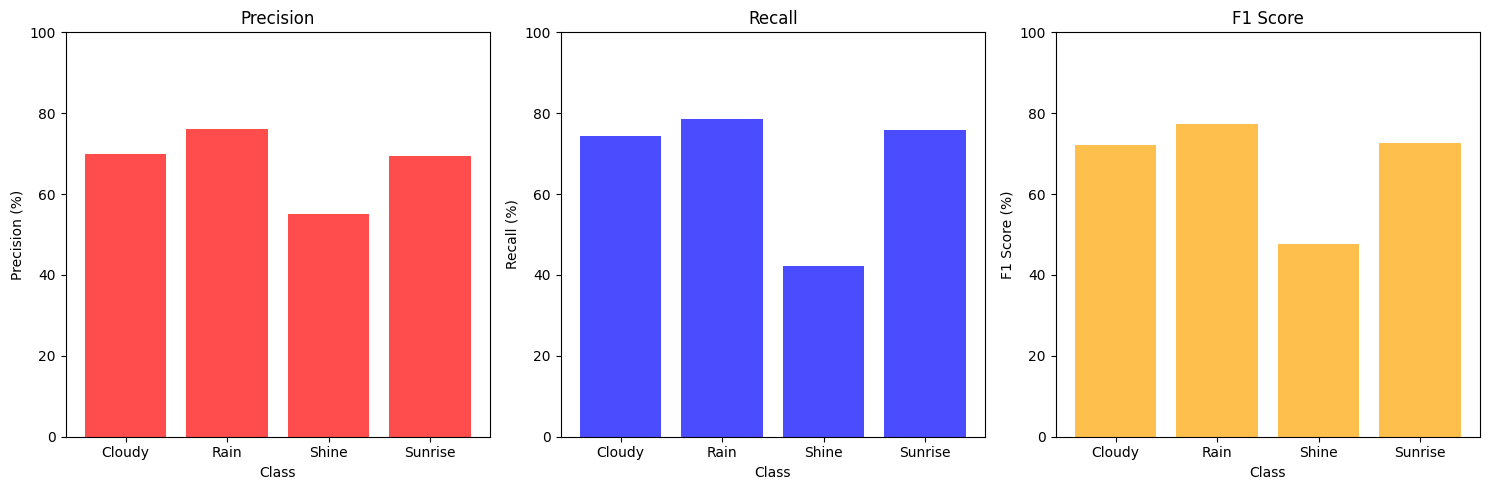

In [15]:
#Calculate precision, recall, and F1 score for each class
classes = np.unique(y_test)

precision_scores = []
recall_scores = []
f1_scores = []

for class_label in classes:
    precision = precision_score(y_test == class_label, y_pred == class_label) * 100
    recall = recall_score(y_test == class_label, y_pred == class_label) * 100
    f1 = f1_score(y_test == class_label, y_pred == class_label) * 100

    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

    print(f"\nClass: {class_label}")
    print(f"Precision: {precision:.2f}%")
    print(f"Recall: {recall:.2f}%")
    print(f"F1 Score: {f1:.2f}%")

overall_precision = precision_score(y_test, y_pred, average='weighted') * 100
overall_recall = recall_score(y_test, y_pred, average='weighted') * 100
overall_f1 = f1_score(y_test, y_pred, average='weighted') * 100

print("\nOverall Results:")
print(f"Precision: {overall_precision:.2f}%")
print(f"Recall: {overall_recall:.2f}%")
print(f"F1 Score: {overall_f1:.2f}%")

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].bar(classes, precision_scores, color='red', alpha=0.7)
ax[0].set_title('Precision')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Precision (%)')
ax[0].set_yticks(np.arange(0, 101, 20))

ax[1].bar(classes, recall_scores, color='blue', alpha=0.7)
ax[1].set_title('Recall')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Recall (%)')
ax[1].set_yticks(np.arange(0, 101, 20))

ax[2].bar(classes, f1_scores, color='orange', alpha=0.7)
ax[2].set_title('F1 Score')
ax[2].set_xlabel('Class')
ax[2].set_ylabel('F1 Score (%)')
ax[2].set_yticks(np.arange(0, 101, 20))

plt.tight_layout()
plt.show()

In [18]:
input_image_path = os.path.abspath('C:/Users/Madhusmita Das/Downloads/MWD/Multi-class Weather Dataset/Shine/shine103.jpg')
input_features = extract_lbp_features(input_image_path, desired_length)


The input image is similar to the classes: ['Shine' 'Sunrise' 'Sunrise' 'Sunrise' 'Sunrise']


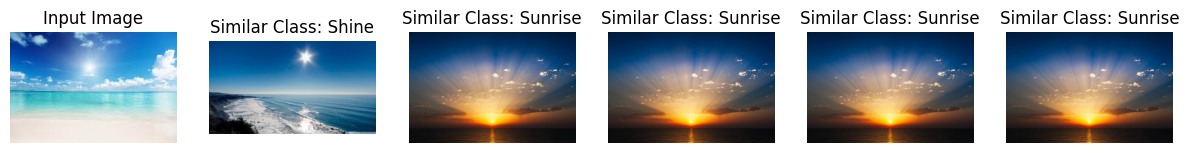

In [19]:
def find_similar_images(input_features, dataset_features, dataset_labels, k=5):
    similarities = cosine_similarity([input_features], dataset_features)
    indices = np.argsort(similarities[0])[-k:][::-1]
    similar_classes = dataset_labels[indices]
    return similar_classes

if input_features is not None:
    similar_classes = find_similar_images(input_features, X_train, y_train, k=5)

    print(f"\nThe input image is similar to the classes: {similar_classes}")

    input_image = cv2.imread(input_image_path)

    plt.figure(figsize=(15, 5))
    plt.subplot(1, 6, 1)
    plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
    plt.title('Input Image')
    plt.axis('off')

    for i, similar_class in enumerate(similar_classes):
        similar_image_path = os.path.join(train_folder, similar_class, os.listdir(os.path.join(train_folder, similar_class))[0])
        similar_image = cv2.imread(similar_image_path)
        plt.subplot(1, 6, i + 2)
        plt.imshow(cv2.cvtColor(similar_image, cv2.COLOR_BGR2RGB))
        plt.title(f'Similar Class: {similar_class}')
        plt.axis('off')

    plt.show()
else:
    print("Error loading input image.")


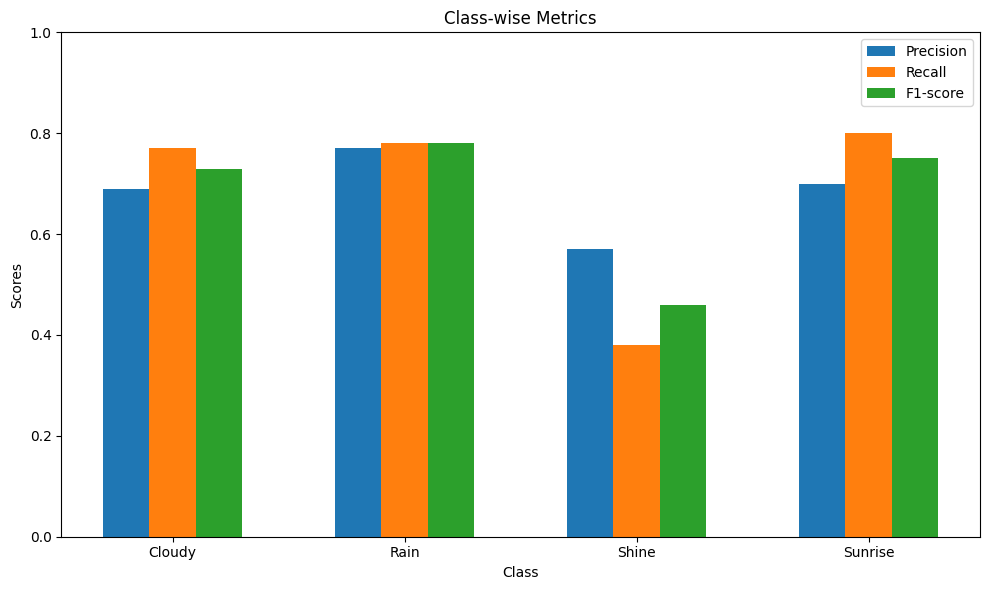

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define class names and corresponding precision, recall, and F1-score values
class_names = ['Cloudy', 'Rain', 'Shine', 'Sunrise']
precision = [0.69, 0.77, 0.57, 0.70]
recall = [0.77, 0.78, 0.38, 0.80]
f1_score = [0.73, 0.78, 0.46, 0.75]

# Plot
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(class_names))

plt.bar(index, precision, bar_width, label='Precision')
plt.bar(index + bar_width, recall, bar_width, label='Recall')
plt.bar(index + 2 * bar_width, f1_score, bar_width, label='F1-score')

plt.xlabel('Class')
plt.ylabel('Scores')
plt.title('Class-wise Metrics')
plt.xticks(index + bar_width, class_names)
plt.legend()
plt.yticks(np.arange(0, 1.01, 0.2))  # Set y-axis ticks from 0 to 1 in increments of 0.02 (2% points)
plt.tight_layout()
plt.show()
